##Building CNN - Convolutional Neural Network
#Project Fashion-Classification - End to End

Train Convolutional Neural Network on 60,000 Fashion-MNIST Images (data in NP array)

Test Convolutional Neural Network on 10,000 Fashion-MNIST Images (data in NP array)

Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras # to build Neural Network

Load Data

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data() # load dataset from  keras

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print shape of Data

X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
X_train   # image data in 3d numpy array shape 28x28 pixel

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
X_train[0]  # image data in 2d numpy array shape 28x28 pixel at 0 th index

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
print(y_train[0],y_train[234])  # at 0 th index we have number 9 which corresponds to 'Ankle boot ' and at 234 th index we have 2-Pullover

9 2


In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

''' 0 => T-shirt/top

1 => Trouser

2 => Pullover

3 => Dress

4 => Coat

5 => Sandal

6 => Shirt

7 => Sneaker

8 => Bag

9 => Ankle boot '''

' 0 => T-shirt/top\n\n1 => Trouser\n\n2 => Pullover\n\n3 => Dress\n\n4 => Coat\n\n5 => Sandal\n\n6 => Shirt\n\n7 => Sneaker\n\n8 => Bag\n\n9 => Ankle boot '

##Show image

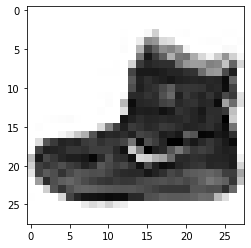

In [ ]:
plt.imshow(X_train[0], cmap='Greys') # At the 0th index we have boot(shoe)

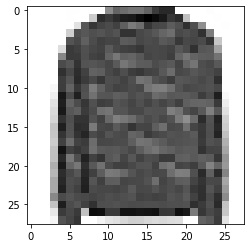

In [ ]:
plt.imshow(X_train[234], cmap='Greys') # pullover

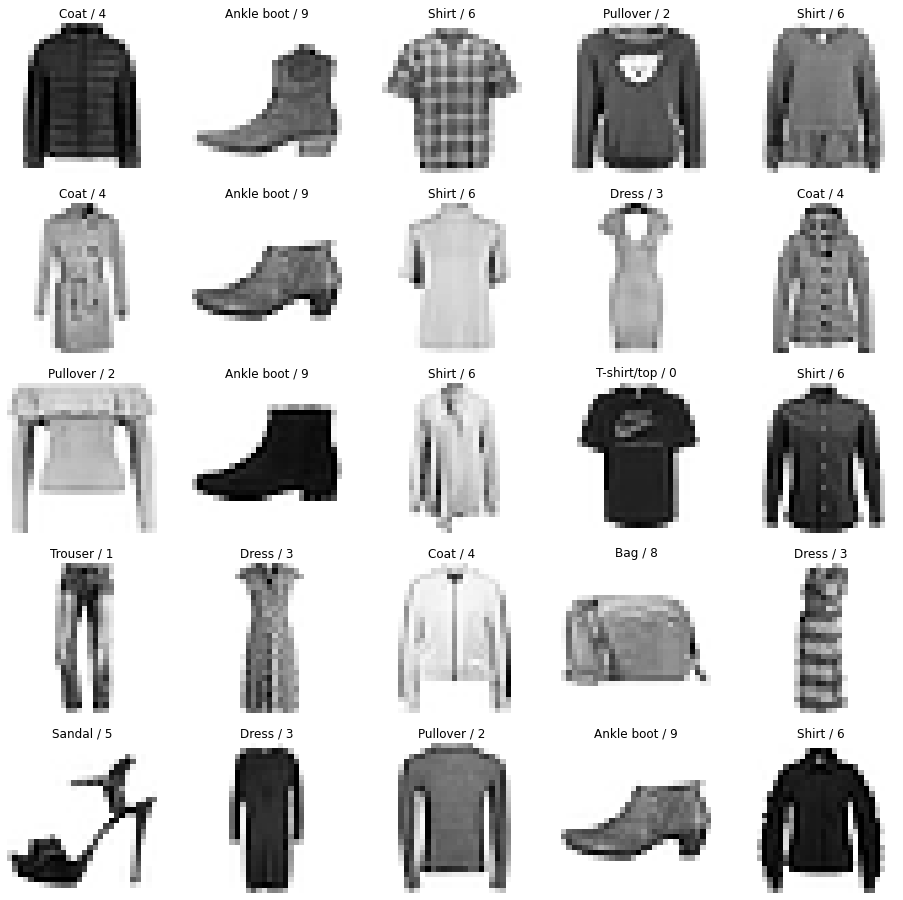

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))



##Change Dimension fro 3d to 4d for input to CNN

In [ ]:
print(X_train.shape,X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
print(X_train.ndim,X_test.ndim)

3 3


In [ ]:
# expected conv2d_input to have 4 dimensions, but got array with shape (28, 28, 1)
# so we have increase the dimention 3 to 4
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# ref: https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html

In [ ]:
print(X_train.shape,X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
print(X_train.ndim,X_test.ndim)  # so we convered 3d to 4d for CNN

4 4


#Feature Scaling

In [ ]:
X_train = X_train/255
X_test = X_test/255

#NORMALIZATION BETWEEN 0 TO 1

In [ ]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

#Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [ ]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

##Convolutional Neural Network - Model Building

In [ ]:
#Building CNN model
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
cnn_model.summary() # get the summary of model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# complie the model
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train cnn model
cnn_model.fit(X_train, y_train, epochs=25, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/25
94/94 [==============================] - 1s 9ms/step - loss: 0.6526 - accuracy: 0.7836 - val_loss: 0.4321 - val_accuracy: 0.8508
Epoch 2/25
94/94 [==============================] - 1s 7ms/step - loss: 0.3839 - accuracy: 0.8654 - val_loss: 0.3747 - val_accuracy: 0.8702
Epoch 3/25
94/94 [==============================] - 1s 7ms/step - loss: 0.3321 - accuracy: 0.8832 - val_loss: 0.3384 - val_accuracy: 0.8831
Epoch 4/25
94/94 [==============================] - 1s 7ms/step - loss: 0.3068 - accuracy: 0.8913 - val_loss: 0.3265 - val_accuracy: 0.8874
Epoch 5/25
94/94 [==============================] - 1s 7ms/step - loss: 0.2830 - accuracy: 0.8991 - val_loss: 0.2994 - val_accuracy: 0.8967
Epoch 6/25
94/94 [==============================] - 1s 7ms/step - loss: 0.2643 - accuracy: 0.9053 - val_loss: 0.3021 - val_accuracy: 0.8956
Epoch 7/25
94/94 [==============================] - 1s 7ms/step - loss: 0.2498 - accuracy: 0.9115 - val_loss: 0.2808 - val_accuracy: 0.9040
Epoch 8/25
94/94 [==

Test the Model

In [ ]:
cnn_model.predict(np.expand_dims(X_test[0],axis=0)).round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
np.argmax(cnn_model.predict(np.expand_dims(X_test[0],axis=0)).round(2))

9

In [ ]:
y_test[0]

9

In [ ]:
y_pred = cnn_model.predict(X_test).round(2)
y_pred

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ]], dtype=float32)

In [ ]:
cnn_model.evaluate(X_test, y_test)

#test data accuracy = 91.03 %
#train data accuracy = 96.12 %

313/313 [==============================] - 1s 2ms/step - loss: 0.2694 - accuracy: 0.9142


[0.269401878118515, 0.9142000079154968]

Visualize output

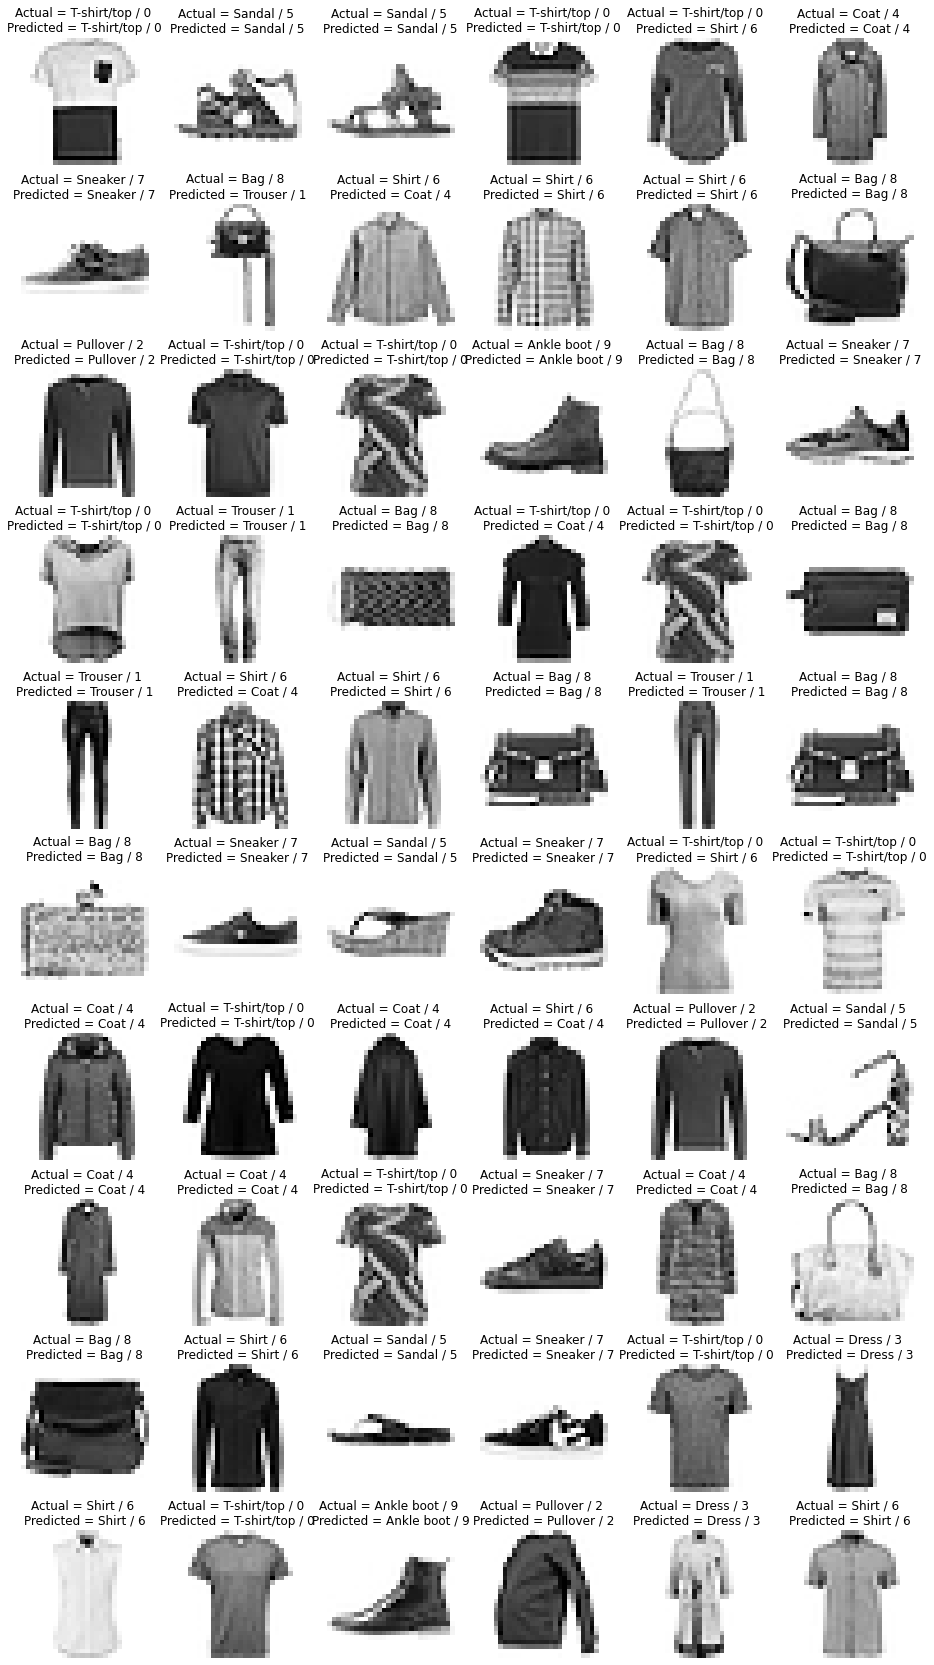

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

Confusion Matrix

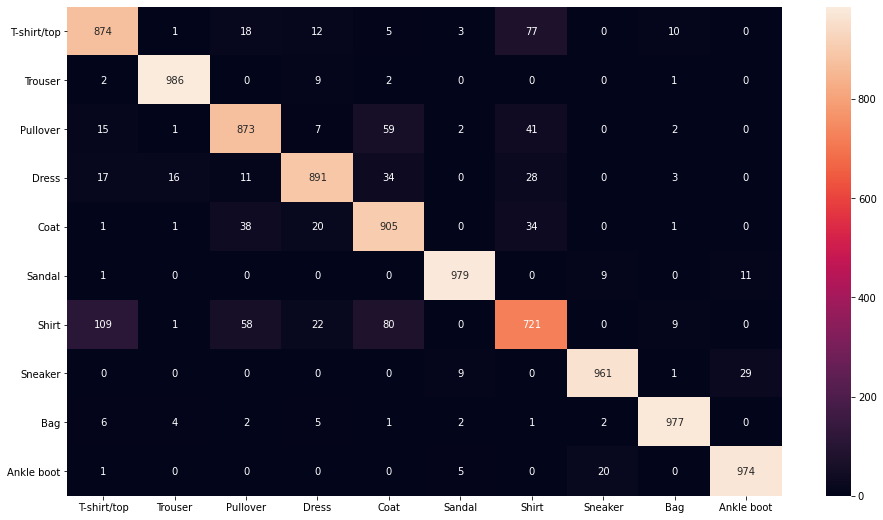

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [ ]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.87      0.86      1000
     Trouser       0.98      0.99      0.98      1000
    Pullover       0.87      0.87      0.87      1000
       Dress       0.92      0.89      0.91      1000
        Coat       0.83      0.91      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.80      0.72      0.76      1000
     Sneaker       0.97      0.96      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# Save Model

In [ ]:
cnn_model.save('fashion_mnist_cnn_model.h5') # Save model 

In [ ]:
path = '/content/drive/My Drive/fashion_mnist_cnn_model_2.h5'

cnn_model.save(path) # Save model 

In [ ]:
model_deploy = keras.models.load_model('fashion_mnist_cnn_model.h5')

In [ ]:
model_deploy.predict(X_test).round(2)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ]], dtype=float32)

In [ ]:
model_deploy.predict(np.expand_dims(X_test[0],axis = 0)).round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
np.argmax(model_deploy.predict(np.expand_dims(X_test[0],axis = 0)).round(2))

#9 number represemts ankle boot

9

##Convolutional Neural Network - Building Complex Model

In [ ]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [ ]:
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=30, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/30
94/94 [==============================] - 1s 11ms/step - loss: 1.0328 - accuracy: 0.6100 - val_loss: 0.5879 - val_accuracy: 0.7730
Epoch 2/30
94/94 [==============================] - 1s 9ms/step - loss: 0.5503 - accuracy: 0.7923 - val_loss: 0.4548 - val_accuracy: 0.8326
Epoch 3/30
94/94 [==============================] - 1s 8ms/step - loss: 0.4503 - accuracy: 0.8365 - val_loss: 0.3930 - val_accuracy: 0.8570
Epoch 4/30
94/94 [==============================] - 1s 9ms/step - loss: 0.3956 - accuracy: 0.8559 - val_loss: 0.3582 - val_accuracy: 0.8696
Epoch 5/30
94/94 [==============================] - 1s 9ms/step - loss: 0.3635 - accuracy: 0.8673 - val_loss: 0.3406 - val_accuracy: 0.8731
Epoch 6/30
94/94 [==============================] - 1s 9ms/step - loss: 0.3332 - accuracy: 0.8791 - val_loss: 0.3257 - val_accuracy: 0.8808
Epoch 7/30
94/94 [==============================] - 1s 9ms/step - loss: 0.3176 - accuracy: 0.8840 - val_loss: 0.3115 - val_accuracy: 0.8842
Epoch 8/30
94/94 [=

train accuracy = 94.37 % 
validation accuracy = 91.03 %

previous model - train accuracy 96.33%  validation_accuracy: 91.37 %

In [ ]:
cnn_model2.evaluate(X_test,y_test)
#test accuarcy = 91.25%

313/313 [==============================] - 1s 2ms/step - loss: 0.2877 - accuracy: 0.9125


[0.2877345383167267, 0.9125000238418579]

In [ ]:
cnn_model2.save('fashion_mnist_cnn_model2.h5')

##VERY VERY COMPLEX MODEL

In [ ]:
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [ ]:
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/50
94/94 [==============================] - 2s 19ms/step - loss: 1.1760 - accuracy: 0.5425 - val_loss: 0.6334 - val_accuracy: 0.7606
Epoch 2/50
94/94 [==============================] - 2s 17ms/step - loss: 0.5851 - accuracy: 0.7826 - val_loss: 0.4971 - val_accuracy: 0.8138
Epoch 3/50
94/94 [==============================] - 2s 17ms/step - loss: 0.4714 - accuracy: 0.8298 - val_loss: 0.4006 - val_accuracy: 0.8514
Epoch 4/50
94/94 [==============================] - 2s 17ms/step - loss: 0.4047 - accuracy: 0.8562 - val_loss: 0.3921 - val_accuracy: 0.8537
Epoch 5/50
94/94 [==============================] - 2s 17ms/step - loss: 0.3645 - accuracy: 0.8708 - val_loss: 0.3626 - val_accuracy: 0.8668
Epoch 6/50
94/94 [==============================] - 2s 17ms/step - loss: 0.3368 - accuracy: 0.8801 - val_loss: 0.3264 - val_accuracy: 0.8821
Epoch 7/50
94/94 [==============================] - 2s 17ms/step - loss: 0.3098 - accuracy: 0.8918 - val_loss: 0.3000 - val_accuracy: 0.8916
Epoch 8/50
94

we can use call back to stop the train and al acc at a point when both are close so as to avoid OVERFITTING

In [ ]:
cnn_model3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4812 - accuracy: 0.9032


[0.48123282194137573, 0.9031999707221985]

TEST ACCUARCY = 90.32 %  TRAIN ACCURACY = 98.07 %
MODEL IS OVERFITTING

In [ ]:
cnn_model3.save('fashion_mnist_cnn_model3.h5')

#cnn model